In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
(train_data, train_labels), (test_data, test_labels) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# Reshape data to include channel dimension (grayscale: 1 channel)
train_data = train_data.reshape((60000, 28, 28, 1))
test_data = test_data.reshape((10000, 28, 28, 1))

# Normalize pixel values to [0, 1]
train_data = train_data.astype('float32') / 255
test_data = test_data.astype('float32') / 255

In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')  # Output layer with softmax
])

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(
    train_data, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.1
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.8411 - loss: 0.5405 - val_accuracy: 0.9820 - val_loss: 0.0643
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9806 - loss: 0.0636 - val_accuracy: 0.9882 - val_loss: 0.0456
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9866 - loss: 0.0415 - val_accuracy: 0.9885 - val_loss: 0.0429
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9904 - loss: 0.0313 - val_accuracy: 0.9903 - val_loss: 0.0376
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9925 - loss: 0.0241 - val_accuracy: 0.9908 - val_loss: 0.0340
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9944 - loss: 0.0183 - val_accuracy: 0.9903 - val_loss: 0.0376
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9953 - loss: 0.0149 - val_accuracy: 0.9920 - val_loss: 0.0352
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9963 - loss: 0.0116 - val_accuracy: 

In [ ]:
test_loss, test_acc = model.evaluate(test_data, test_labels, verbose=0)
print(f'\nTest accuracy: {test_acc:.4f}')


Test accuracy: 0.9920


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 660ms/step


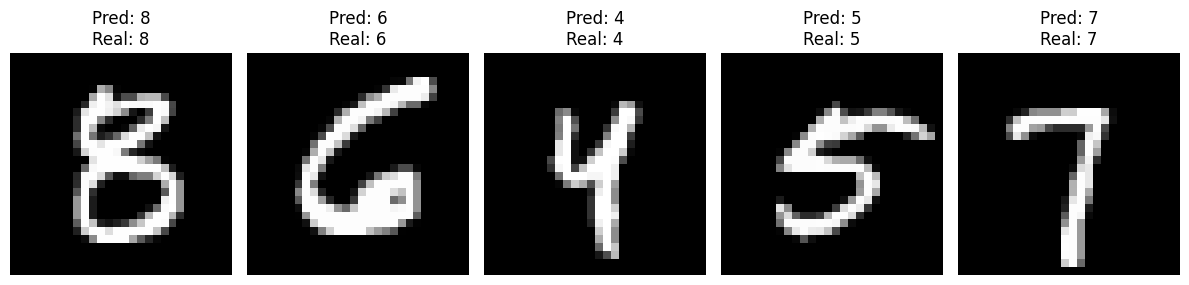

In [ ]:
import matplotlib.pyplot as plt

# Seleccionar 5 ejemplos aleatorios del conjunto de prueba
sample_indices = np.random.choice(len(test_data), 5, replace=False)
predictions = model.predict(test_data[sample_indices])
predicted_labels = np.argmax(predictions, axis=1)

# Mostrar imágenes y predicciones
plt.figure(figsize=(12, 6))
for i, idx in enumerate(sample_indices):
    plt.subplot(1, 5, i+1)
    plt.imshow(test_data[idx].reshape(28, 28), cmap='gray')
    plt.title(f"Pred: {predicted_labels[i]}\nReal: {test_labels[idx]}")
    plt.axis('off')
plt.tight_layout()
plt.show()